In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = pd.read_csv('final.csv',encoding='utf8')

In [3]:
data_all.head(10)

,Unnamed: 0,Unnamed: 0.1,time,title,poster_temp,area_temp,unit_temp,price_temp,temp,final_price
0,0,7,2020-08-07,"Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ",môi giới,tp hồ chí minh,tỷ,4.200000,-1,4.200000e+09
1,1,8,2020-08-07,Chung cư Opal Boulevard 95.49m² 3PN,môi giới,tp hồ chí minh,tỷ,3.308559,-1,3.308559e+09
2,2,10,2020-08-07,"Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ",môi giới,hà nội,tỷ,1.620000,-1,1.620000e+09
3,3,12,2020-08-07,Nhà trệt lầu . Hùynh thúc kháng,môi giới,cần thơ,tỷ,1.840000,-1,1.840000e+09
4,4,14,2020-08-07,"Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...",môi giới,tp hồ chí minh,tỷ,2.250000,-1,2.250000e+09
5,5,15,2020-08-07,Bán nhà Huyện Hóc Môn 34m²,phương minh,tp hồ chí minh,tỷ,2.200000,-1,2.200000e+09
6,6,16,2020-08-07,Nhà 1 lửng 2PN đất 63m2 cực đẹp ĐS 17 Linh Trung,nhà đất đức ngân - mua bán nhà đất sài gòn,tp hồ chí minh,tỷ,3.350000,-1,3.350000e+09
7,7,17,2020-08-07,Đất mặt tiền Phú Nông - Vĩnh Ngọc hàng hiếm,môi giới,khánh hòa,tỷ,2.073000,-1,2.073000e+09
8,8,19,2020-08-07,Nhà 1 trệt 1 lầu đường 44 - kdc 586 - cái răng,môi giới,cần thơ,tỷ,2.350000,-1,2.350000e+09
9,9,20,2020-08-07,Nhà lửng trục chính An Gia,môi giới,cần thơ,tỷ,1.100000,-1,1.100000e+09


In [4]:
data_all['title'].head(5)

0     Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ
1                  Chung cư Opal Boulevard 95.49m² 3PN
2    Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ
3                      Nhà trệt lầu . Hùynh thúc kháng
4    Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...
Name: title, dtype: object

In [5]:
# Vẽ biểu dồ môi giới/others
df = data_all.groupby('poster_temp')['time'].count().reset_index()
df = df.sort_values(by=['time'])

In [6]:
df.tail(5)

,poster_temp,time
20074,tuấn,186
8951,minh,190
13667,ngọc anh nhà đất gò vấp tb,198
18197,trang,213
9795,môi giới,223708


In [7]:
# PIE CHART
df_draw = df[-1:].copy()
# print(df_draw)
new_row = pd.DataFrame(data = {
    'poster_temp' : ['Others'],
    'time' : [df['time'][:-1].sum()]
})
df_draw = pd.concat([df_draw, new_row])

In [8]:
df_draw

,poster_temp,time
9795,môi giới,223708
0,Others,58937


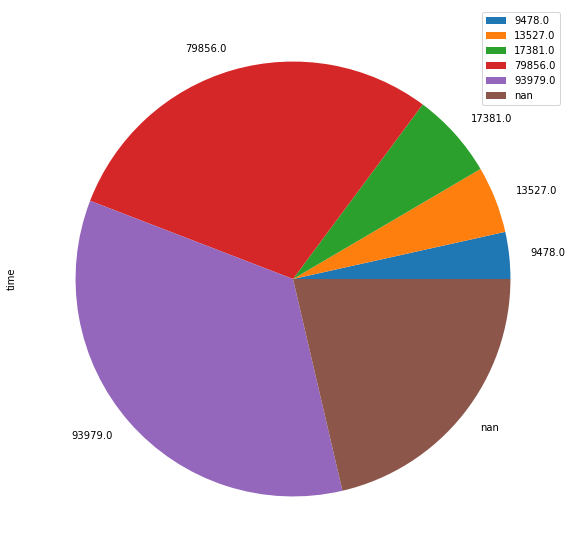

In [13]:
# Vẽ biểu đồ
df_draw.set_index('poster_temp',inplace=True)
df_draw.plot.pie(y='time', figsize=(10, 10))
plt.show()

In [14]:
# Các tỉnh thành thì ở đâu mua bán nhà nhộn nhịp nhất?
# Count so luong tin
data_city = data_all.groupby('area_temp').count().reset_index()
data_city.head(100)
data_city = data_city.sort_values(by=['time'])

df_draw = data_city[-5:].copy()
new_row = pd.DataFrame(data = {
    'area_temp' : ['Others'],
    'time' : [df['time'][:-5].sum()]
})
df_draw = pd.concat([df_draw, new_row])

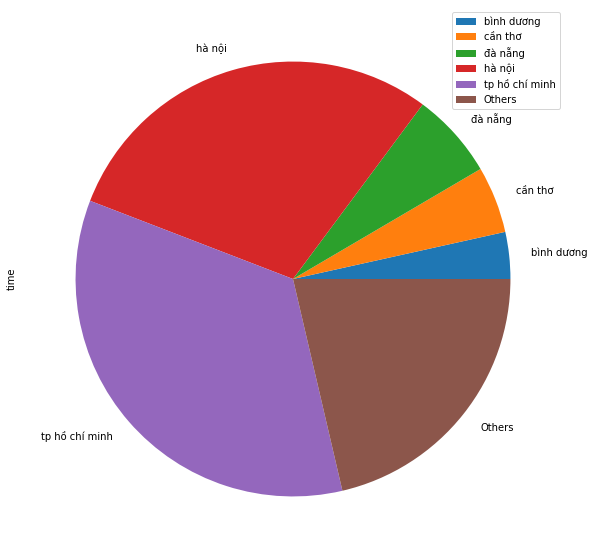

In [15]:
# Plot
df_draw.set_index('area_temp',inplace=True)
df_draw.plot.pie(y='time',figsize=(10, 10))
plt.show()

In [16]:
# Tổng số tiền?
# Sum
data_city = data_all.groupby('area_temp').sum().reset_index()
data_city = data_city.sort_values(by=['final_price'])
data_city.tail(100)

df_draw = data_city[-5:].copy()
new_row = pd.DataFrame(data = {
    'area_temp' : ['Others'],
    'final_price' : [data_city['final_price'][:-5].sum()]
})
df_draw = pd.concat([df_draw, new_row])
df_draw.head(10)

,area_temp,Unnamed: 0,Unnamed: 0.1,price_temp,temp,final_price
63,cần thơ,1.978102e+09,2.536967e+09,58284.160676,-13527.0,4.898658e+13
53,bình dương,1.296183e+09,1.655349e+09,60657.854676,-9478.0,5.219752e+13
108,đà nẵng,3.015445e+09,3.929481e+09,106467.596912,-17381.0,8.083710e+13
67,hà nội,1.191555e+10,1.531406e+10,389545.257621,-79856.0,3.356368e+14
100,tp hồ chí minh,1.266217e+10,1.614350e+10,477457.053111,-93979.0,4.337730e+14
0,Others,NaN,NaN,NaN,NaN,3.757446e+14


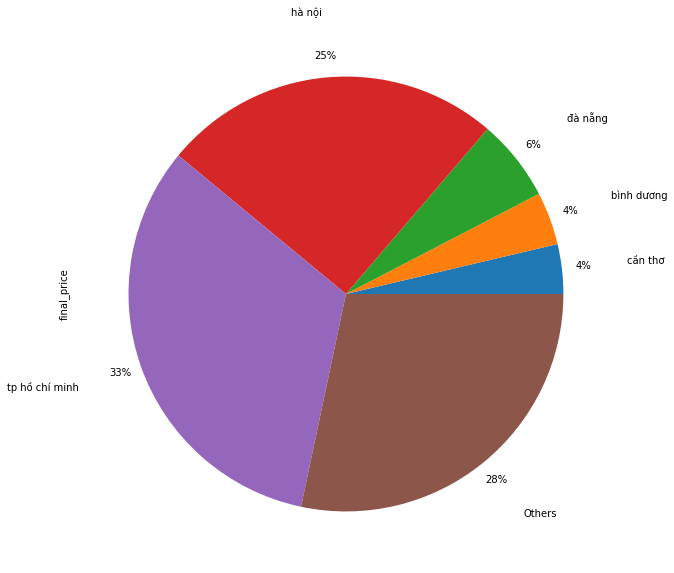

In [17]:
# Plot
df_draw.set_index('area_temp',inplace=True)
df_draw.plot.pie(y='final_price',figsize=(10, 10),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3,legend=0)
plt.show()

In [18]:
#  Kiểm tra giá lớn nhất được rao bán ở các tỉnh thành?
# Sum so tien
data_city_mm = data_all.groupby('area_temp').agg({"final_price":"max"})
data_city_mm.sort_values(by=['final_price'],inplace=True)

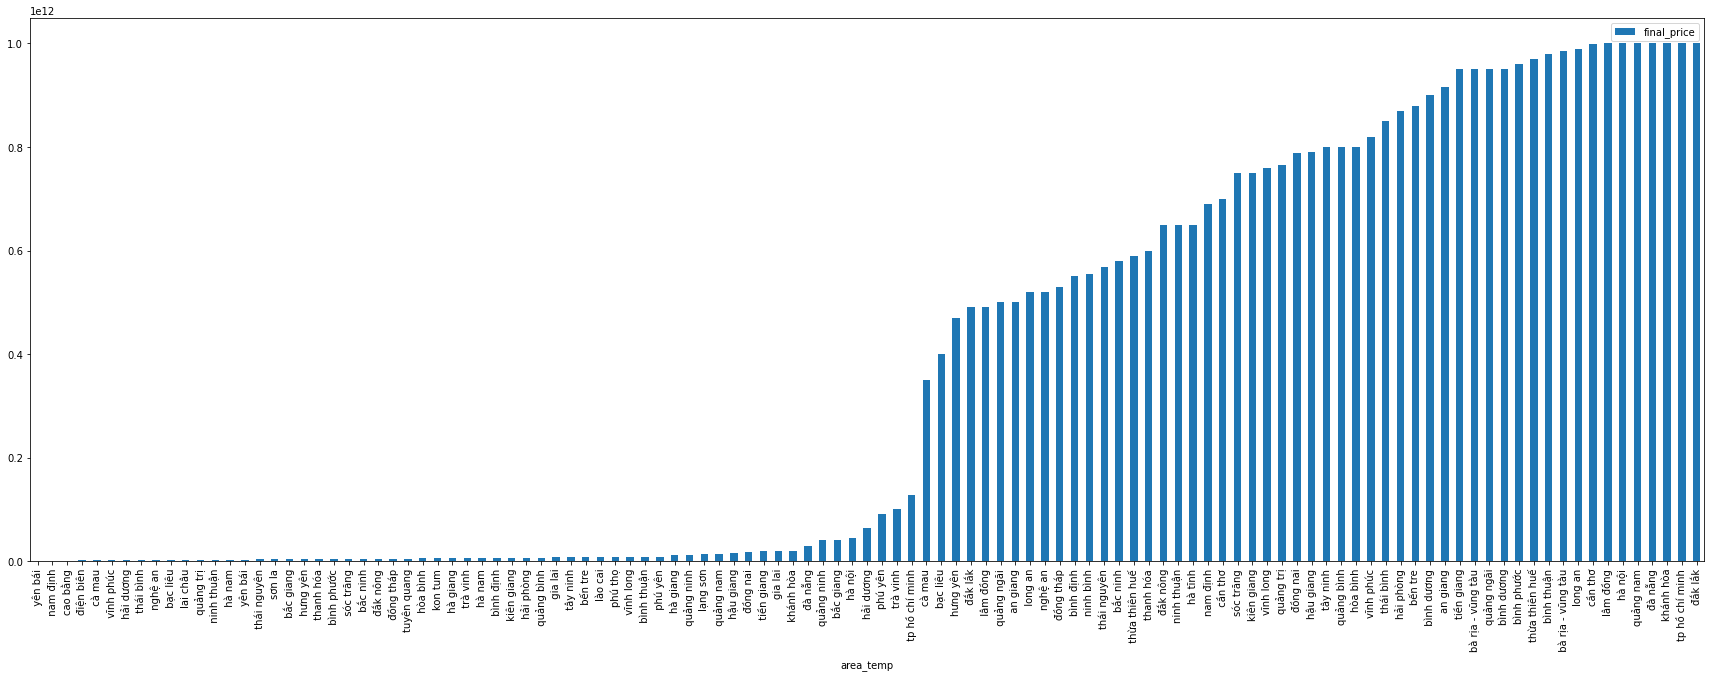

In [19]:
# Plot
data_city_mm.plot.bar(figsize=(30,10))
plt.show()

In [22]:
# giá trị trung bình của một tin đăng?
# Sum so tien
data_city_mm = data_all.groupby('area_temp')['final_price'].mean().reset_index()
data_city_mm.sort_values(by=['final_price'],inplace=True)
data_city_mm.head(100)


,area_temp,final_price
45,yên bái,9.108000e+08
25,nam định,1.090000e+09
61,cao bằng,1.200000e+09
36,thái bình,1.362500e+09
107,điện biên,1.375000e+09
...,...,...
51,an giang,7.613889e+09
92,quảng trị,7.910419e+09
105,vĩnh phúc,8.186882e+09
24,lâm đồng,8.193290e+09


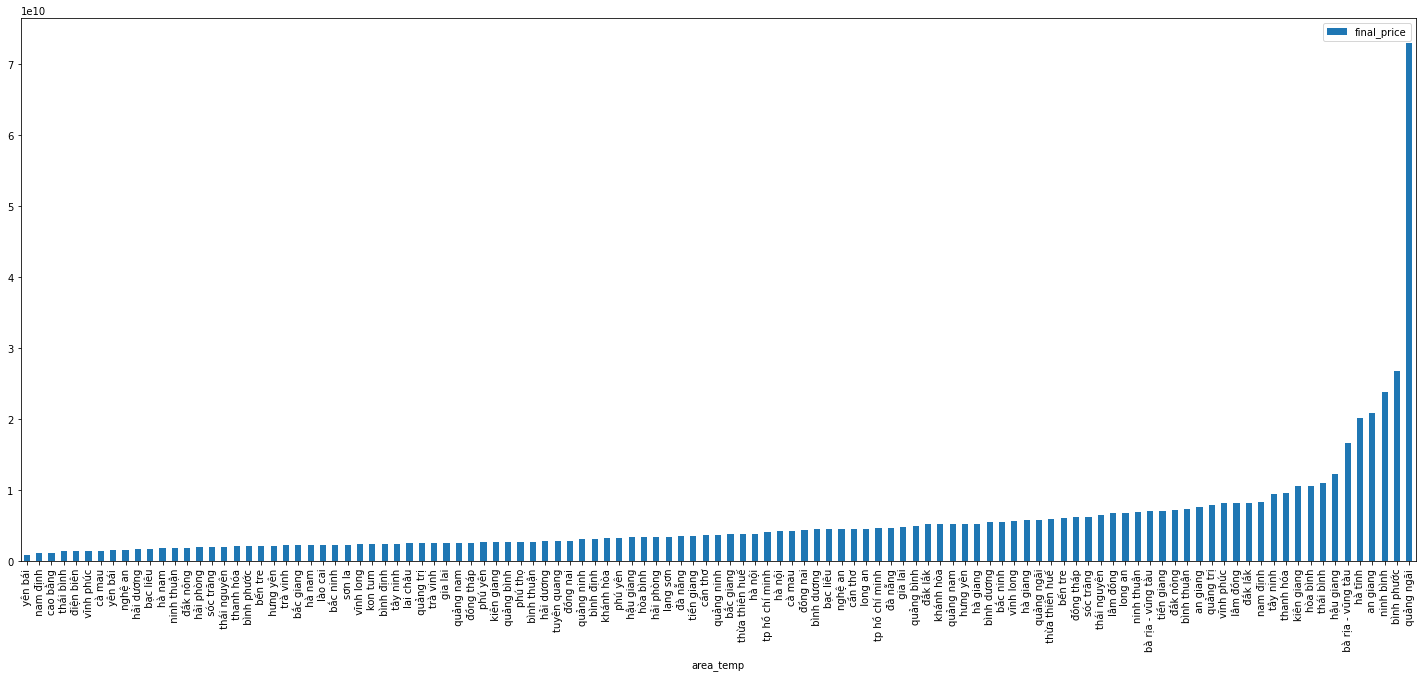

In [23]:
data_city_mm.set_index('area_temp',inplace=True)
data_city_mm.plot.bar(figsize=(25,10))
plt.show()